In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
ALLOW_CUDA = False
ALLOW_MPS = False

In [2]:
if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Deivce: {DEVICE}")

Deivce: cpu


In [3]:
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

In [4]:
# text to image
prompt = "A dog wearing sunglasses, standing on skateboard, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = "deformed, cat"
do_cfg = True
cfg_scale = 5

In [5]:
# image to image

input_image = None
# Comment to disable image to image
image_path = "../images/dog.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

In [6]:
# sampler

sampler = "ddpm"
num_inference_steps = 50
seed = 1337

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

100%|██████████| 45/45 [04:32<00:00,  6.06s/it]


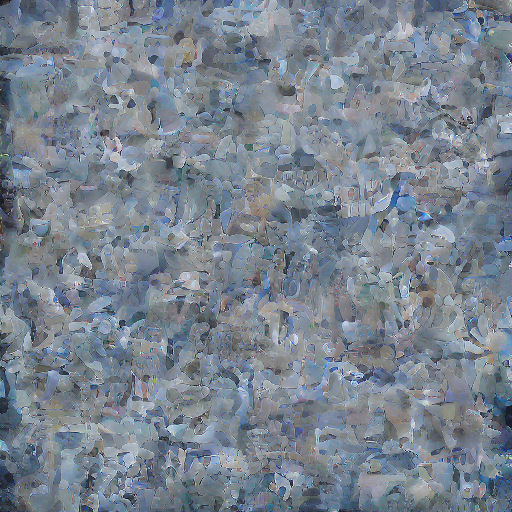

In [7]:
# Combine the input image and the output image into a single image.
Image.fromarray(output_image)